In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_test = pd.read_csv("test.csv", infer_datetime_format=True)
df_test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [21]:
df_train = pd.read_csv("train.csv", infer_datetime_format=True)
df_train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [22]:
from sklearn.ensemble import RandomForestClassifier

print(df_train.shape)
print(df_test.shape)

(233154, 41)
(112392, 40)


In [5]:
car_train = pd.get_dummies(df_train, columns=['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION'], sparse=True)
car_test = pd.get_dummies(df_test, columns=['Employment.Type', 'PERFORM_CNS.SCORE.DESCRIPTION'], sparse=True)

In [23]:
car_train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'Employment.Type_Salaried', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_A-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCR

In [28]:
import re
car_train['DisbursalDate'] = pd.to_datetime(car_train['DisbursalDate'], format = "%d-%m-%y",infer_datetime_format=True)
car_train['Date.of.Birth'] = pd.to_datetime(car_train['Date.of.Birth'], format = "%d-%m-%y",infer_datetime_format=True)
now = pd.Timestamp('now')
car_train['Age'] = (now - car_train['Date.of.Birth']).astype('<m8[Y]').astype(int)
age_mean = int(car_train[car_train['Age']>0]['Age'].mean())
 
car_train['credit_history_length_in_months'] = car_train['CREDIT.HISTORY.LENGTH'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))
    
car_test['DisbursalDate'] = pd.to_datetime(car_test['DisbursalDate'], format = "%d-%m-%y",infer_datetime_format=True)
car_test['Date.of.Birth'] = pd.to_datetime(car_test['Date.of.Birth'], format = "%d-%m-%y",infer_datetime_format=True)
now = pd.Timestamp('now')
car_test['Age'] = (now - car_test['Date.of.Birth']).astype('<m8[Y]').astype(int)
age_mean = int(car_test[car_test['Age']>0]['Age'].mean())

car_test['credit_history_length_in_months'] = car_test['CREDIT.HISTORY.LENGTH'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))
    
X= car_train[['disbursed_amount', 'asset_cost', 'credit_history_length_in_months',
            'Aadhar_flag', 'PAN_flag',
       'PERFORM_CNS.SCORE',
             'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT',  'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT',  'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'NO.OF_INQUIRIES', 'Age', 'Employment.Type_Salaried', 'Employment.Type_Self employed', 
        'PERFORM_CNS.SCORE.DESCRIPTION_A-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_E-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_G-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk']]
y= car_train["loan_default"].values.reshape(-1,1)
print(X.shape, y.shape)

(233154, 36) (233154, 1)


In [29]:
print(car_train.shape)
print(car_test.shape)

(233154, 63)
(112392, 61)


In [30]:
features = ['disbursed_amount', 'asset_cost', 'credit_history_length_in_months', 'Aadhar_flag', 'PAN_flag',
       'PERFORM_CNS.SCORE',
             'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT',  'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT',  'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'NO.OF_INQUIRIES', 'Age', 'Employment.Type_Salaried', 'Employment.Type_Self employed',
        'PERFORM_CNS.SCORE.DESCRIPTION_A-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_E-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_G-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk']
from sklearn.preprocessing import  RobustScaler

rob_scaler = RobustScaler()

scaled_training = car_train.copy()
scaled_testing = car_test.copy()


scaled_training[features] = rob_scaler.fit_transform(scaled_training[features])
scaled_testing[features] = rob_scaler.fit_transform(scaled_testing[features])

y = scaled_training.loan_default
X = scaled_training[features]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

print(X_train.shape, y_train.shape)

(174865, 36) (174865,)
(58289, 36) (58289,)
(174865, 36) (174865,)


In [32]:
X.shape

(233154, 36)

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,roc_auc_score, roc_curve, auc
def train_model(model):
    # Checking accuracy
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('accuracy_score',accuracy_score(y_test, pred))
    print('recall_score',recall_score(y_test, pred))
    print('f1_score',f1_score(y_test, pred))
    print('roc_auc_score',roc_auc_score(y_test, pred))
    # confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    return model

In [34]:
rfc = RandomForestClassifier()
rfc = train_model(rfc)

C:\Users\pedroulises\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.7602120468699068
recall_score 0.08140361969493401
f1_score 0.12845295254723452
roc_auc_score 0.5149107676877684
confusion_matrix
       0     1
0  43282  2354
1  11623  1030


In [35]:
unique_id = scaled_testing.UniqueID
y_pred_rf = rfc.predict(scaled_testing[features])
submission1 = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_rf})
submission1.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [36]:
feature_names = features

rfc.score(X_test, y_test)

0.7602120468699068

In [37]:
sorted(zip(rfc.feature_importances_, feature_names), reverse=True)

[(0.28184119405243224, 'asset_cost'),
 (0.25231410063708554, 'disbursed_amount'),
 (0.13768234081695913, 'Age'),
 (0.050831300940572796, 'credit_history_length_in_months'),
 (0.04301097550296874, 'PRI.CURRENT.BALANCE'),
 (0.04069168999254388, 'PRI.SANCTIONED.AMOUNT'),
 (0.040087212764027165, 'PRI.DISBURSED.AMOUNT'),
 (0.03983034708652335, 'PERFORM_CNS.SCORE'),
 (0.015098650553461318, 'PRI.ACTIVE.ACCTS'),
 (0.014571844385125978, 'NO.OF_INQUIRIES'),
 (0.011765700850457186, 'NEW.ACCTS.IN.LAST.SIX.MONTHS'),
 (0.007406003144302828, 'Employment.Type_Self employed'),
 (0.007311719015235975, 'Employment.Type_Salaried'),
 (0.0072190375487908255, 'PAN_flag'),
 (0.0064715372119942115, 'Aadhar_flag'),
 (0.006383102698593277, 'PRI.OVERDUE.ACCTS'),
 (0.0061843979169919775, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'),
 (0.002304665130031677, 'SEC.SANCTIONED.AMOUNT'),
 (0.0022121900931057208, 'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk'),
 (0.001980154837601436, 'PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk'

k: 1, Train/Test Score: 0.999/0.674
k: 3, Train/Test Score: 0.837/0.722
k: 5, Train/Test Score: 0.808/0.745
k: 7, Train/Test Score: 0.797/0.758
k: 9, Train/Test Score: 0.792/0.765
k: 11, Train/Test Score: 0.789/0.770
k: 13, Train/Test Score: 0.788/0.774
k: 15, Train/Test Score: 0.787/0.776
k: 17, Train/Test Score: 0.786/0.777
k: 19, Train/Test Score: 0.785/0.778


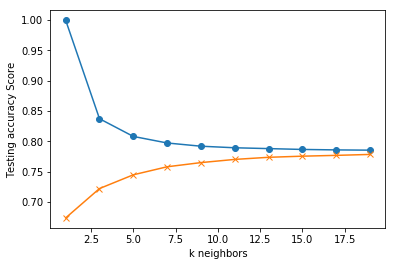

In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Test Acc: 0.770
